In [ ]:
'''
【课程2.2】  异常值处理

异常值是指样本中的个别值，其数值明显偏离其余的观测值。
异常值也称离群点，异常值的分析也称为离群点的分析

异常值分析 → 3σ原则 / 箱型图分析         (σ标准差)
异常值处理方法 → 删除 / 修正填补

##############################################
个人总结：
本节主要是如何做异常值的分析，如何筛选出异常值
处理方法参考缺失值处理就好
(一般用箱线图做异常值分析，通过分位数筛更精确)
（3σ标准差离中间集中区域大于3倍标准差的特别少）
##############################################
'''

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

均值为：2.303，标准差为：100.110
------
异常值共25条


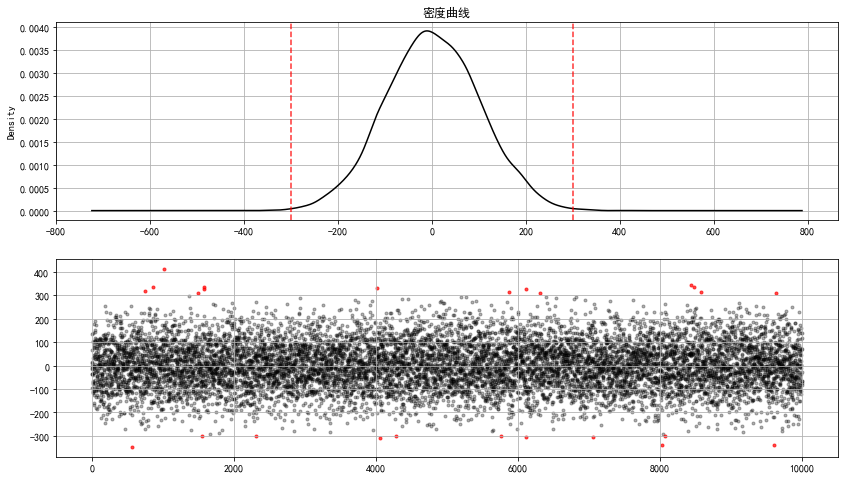

In [31]:
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003

data = pd.Series(np.random.randn(10000)*100)
# 创建数据
data.head(10)

u = data.mean()  # 计算均值
std = data.std()  # 计算标准差
stats.kstest(data, 'norm', (u, std))
print('均值为：%.3f，标准差为：%.3f' % (u,std))
print('------')
# 正态性检验

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde', grid = True, style = '-k', title = '密度曲线')
plt.axvline(3*std, color='r', linestyle='--', alpha=0.8)
plt.axvline(-3*std, color='r', linestyle='--', alpha=0.8)
# 绘制数据密度曲线

error = data[np.abs(data - u) > 3*std]
data_c = data[np.abs(data - u) <= 3*std]
ax2 = fig.add_subplot(2,1,2)
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index, data_c, color = 'k', marker = '.', alpha = 0.3)
plt.scatter(error.index, error, color = 'r', marker = '.', alpha = 0.7)
# plt.xlim([-10,10010])
plt.grid()
# 图表表达

count    10000.000000
mean         2.303320
std        100.110392
min       -345.596202
25%        -66.005806
50%          1.280975
75%         70.663680
max        410.308997
dtype: float64
------
分位差为：136.669，下限为：-271.010，上限为：275.668
------
异常值共53条


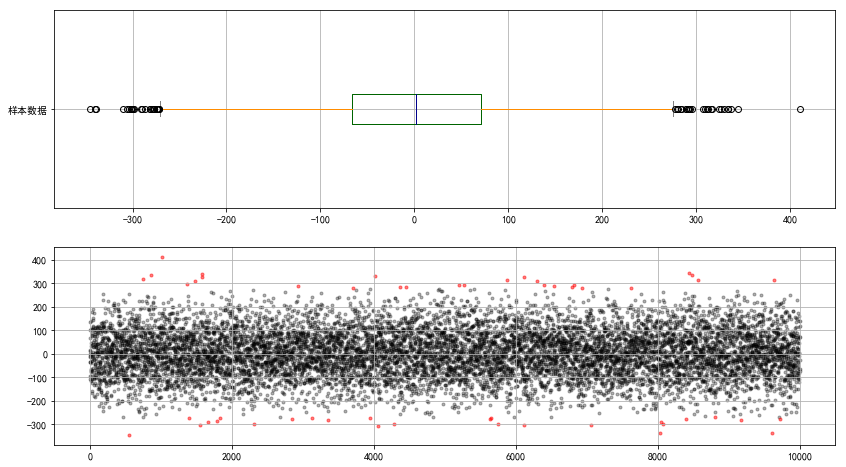

In [37]:
# 异常值分析
# （2）箱型图分析

fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid = True,color = color,ax = ax1,label = '样本数据')
# 箱型图看数据分布情况
# 以内限为界

s = data.describe()
print(s)
print('------')
# 基本统计量

q1 = s['25%']    # 四分位
q3 = s['75%']    # 四分之三位
iqr = q3 - q1    # 分位差
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print('分位差为：%.3f，下限为：%.3f，上限为：%.3f' % (iqr,mi,ma))
print('------')
# 计算分位差

ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) & (data <= ma)]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index, data_c, color = 'k', marker = '.', alpha = 0.3)
plt.scatter(error.index, error, color = 'r', marker = '.', alpha = 0.5)
# plt.xlim([-10,10010])
plt.grid()
# 图表表达